<a href="https://colab.research.google.com/github/TessRedie/Project_image_classification/blob/master/flower_classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Augmentation to Address Overfitting in Flower classification CNN

In this notebook, I will build a CNN to classify flower images. You will also see how model overfits and overfitting can be addressed using data augmentation. [Data augmentation](https://www.tensorflow.org/tutorials/images/data_augmentation) is a technique to increase the diversity of training samples from current training dataset using transformations such as zoom, rotations, change in contrast etc.

Credts: 

1. Tensorflow official tutorial: [Image classification](https://www.tensorflow.org/tutorials/images/classification)
2. [Data augmentation to address overfitting | Deep Learning Tutorial 26 (Tensorflow, Keras & Python)](https://www.youtube.com/watch?v=mTVf7BN7S8w)

## Libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import pathlib
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator

# Data Import

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
data_dir
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228827136/228813984 [==============================] - 3s 0us/step


'./datasets/flower_photos'

In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [ ]:
list(data_dir.glob('*/*.jpg'))[:3]

[PosixPath('datasets/flower_photos/roses/218630974_5646dafc63_m.jpg'),
 PosixPath('datasets/flower_photos/roses/3231873181_faf2da6382.jpg'),
 PosixPath('datasets/flower_photos/roses/3102535578_ec8c12a7b6_m.jpg')]

In [ ]:
roses = list(data_dir.glob('roses/*'))
roses[:5]


[PosixPath('datasets/flower_photos/roses/218630974_5646dafc63_m.jpg'),
 PosixPath('datasets/flower_photos/roses/3231873181_faf2da6382.jpg'),
 PosixPath('datasets/flower_photos/roses/3102535578_ec8c12a7b6_m.jpg'),
 PosixPath('datasets/flower_photos/roses/1645761726_2b1be95472.jpg'),
 PosixPath('datasets/flower_photos/roses/16484100863_979beacb08.jpg')]

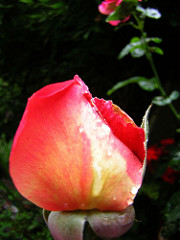

In [ ]:
PIL.Image.open(str(roses[0]))

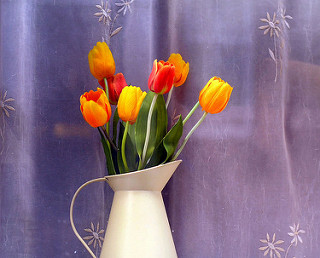

In [ ]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[1]))

### Read flowers images from disk into numpy array using opencv

In [ ]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [ ]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [ ]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/218630974_5646dafc63_m.jpg'),
 PosixPath('datasets/flower_photos/roses/3231873181_faf2da6382.jpg'),
 PosixPath('datasets/flower_photos/roses/3102535578_ec8c12a7b6_m.jpg'),
 PosixPath('datasets/flower_photos/roses/1645761726_2b1be95472.jpg'),
 PosixPath('datasets/flower_photos/roses/16484100863_979beacb08.jpg')]

In [ ]:
str(flowers_images_dict['roses'][0])


'datasets/flower_photos/roses/218630974_5646dafc63_m.jpg'

In [ ]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [ ]:
img.shape

(240, 180, 3)

In [ ]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [ ]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [ ]:
X = np.array(X)
y = np.array(y)

Train test split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Preprocessing: scale images

In [ ]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

### Build convolutional neural network and train it

In [ ]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=20)

Epoch 1/20
86/86 [==============================] - 98s 1s/step - loss: 0.0040 - accuracy: 0.9993
Epoch 2/20
86/86 [==============================] - 83s 962ms/step - loss: 0.0043 - accuracy: 0.9993
Epoch 3/20
86/86 [==============================] - 82s 959ms/step - loss: 0.0020 - accuracy: 0.9996
Epoch 4/20
86/86 [==============================] - 83s 960ms/step - loss: 0.0026 - accuracy: 0.9996
Epoch 5/20
86/86 [==============================] - 82s 955ms/step - loss: 0.0025 - accuracy: 0.9996
Epoch 6/20
86/86 [==============================] - 82s 954ms/step - loss: 0.0019 - accuracy: 0.9996
Epoch 7/20
86/86 [==============================] - 82s 954ms/step - loss: 0.0024 - accuracy: 0.9996
Epoch 8/20
86/86 [==============================] - 82s 954ms/step - loss: 0.0019 - accuracy: 0.9996
Epoch 9/20
86/86 [==============================] - 82s 953ms/step - loss: 0.0032 - accuracy: 0.9993
Epoch 10/20
86/86 [==============================] - 82s 953ms/step - loss: 0.0014 - accuracy:

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (32, 180, 180, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 90, 90, 16)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 90, 90, 32)          4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 45, 45, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (32, 45, 45, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (32, 22, 22, 64)         0

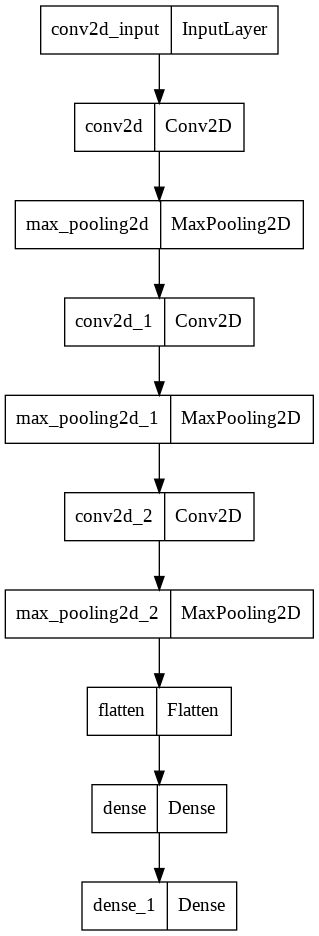

In [ ]:
keras.utils.plot_model(model, "Flower_classification.png")

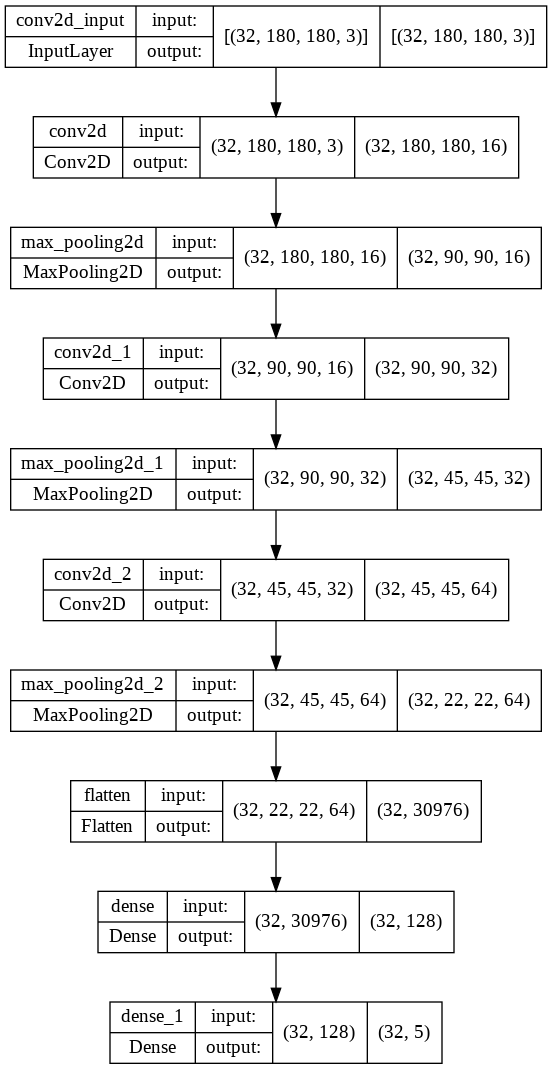

In [ ]:
keras.utils.plot_model(model, "Flower_classification.png", show_shapes=True)


In [ ]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 8s 274ms/step - loss: 3.0105 - accuracy: 0.6383


[3.0104517936706543, 0.6383442282676697]

Here we see that while train accuracy is very high (99%), the test accuracy is significantly low (62.64%) indicating overfitting. Let's make some predictions before we use data augmentation to address overfitting

In [ ]:
predictions = model.predict(X_test_scaled)
predictions

array([[ -6.2995615 ,  24.09991   ,   7.29128   , -28.586876  ,
        -10.481641  ],
       [  7.681094  ,   1.99475   ,  -5.6368465 ,  -9.225113  ,
          3.869167  ],
       [ -0.6539257 ,   2.021869  ,  10.794986  , -11.91528   ,
         -6.0965557 ],
       ...,
       [ -1.5301285 , -12.4739065 ,   1.1230067 ,  12.238473  ,
         -7.6994143 ],
       [ 15.580494  ,  -0.53671145, -19.219877  ,  -3.2040882 ,
          9.029332  ],
       [-12.561014  , -20.96223   ,   0.05637256,  28.166979  ,
        -10.010552  ]], dtype=float32)

In [ ]:
score = tf.nn.softmax(predictions[0])

In [ ]:
np.argmax(score)

1

In [ ]:
y_test[0]

1

### Improve Test Accuracy Using Data Augmentation

In [ ]:
img_height = 180
img_width = 180

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal",
                                                 input_shape=(180, 180,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

NameError: ignored

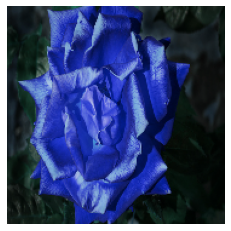

In [ ]:
plt.axis('off')
plt.imshow(X[12])

NameError: ignored

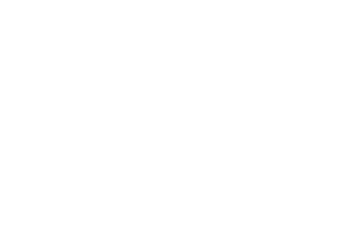

In [ ]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

# Train the model using data augmentation and a drop out layer

In [ ]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)    

NameError: ignored

In [ ]:

model.evaluate(X_test_scaled,y_test)